##### Copyright 2020 The TensorFlow Authors.

# Training + evaluation + testing with the built-in methods

## Setup

In [2]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import pandas as pd

2022-06-30 21:42:18.366566: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-06-30 21:42:18.366586: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


Now, let's review each piece of this workflow in detail.

In [3]:
# charge 9 models
model1 = tf.keras.models.load_model('model_saved_1')
model2 = tf.keras.models.load_model('model_saved_2')
model3 = tf.keras.models.load_model('model_saved_3')
model4 = tf.keras.models.load_model('model_saved_4')
model5 = tf.keras.models.load_model('model_saved_5')
model6 = tf.keras.models.load_model('model_saved_6')
model7 = tf.keras.models.load_model('model_saved_7')
model8 = tf.keras.models.load_model('model_saved_8')
model9 = tf.keras.models.load_model('model_saved_9')


import numpy as np 
import sys
np.set_printoptions(threshold=sys.maxsize)
import matplotlib
#matplotlib.use('Agg')
import matplotlib.pyplot as plt
import mpl_style
plt.style.use(mpl_style.style1)

def cut_plot(lbins,ubins,data):
    # carry out the removal of bins on the plots
    # lbins: nº of bins to remove on the left side
    # ubins: nº of bins to remove on the right side
    bins = data[lbins:-ubins,0]
    output = data[lbins:-ubins,1:]
    return bins,output

nparam = 10
nmodels = 1000
sim = 'UNIT100' # simulation used
# array with the name of the plots we want to use
plots = ['KLF_z0','rLF_z0','early-t_z0','late-t_z0','HIMF_z0','early-f_z0','TF_z0',
         'bulge-BH_z0','Zstars_z0','KLF_z1.1']
xlabel = []
ylabel = []
xlim = []
ylim = []
# weight for each plot in the emulator training
weight = [2,2,1,1,3,1,1,1,1,2,1]
# cuts
lcut = []
ucut = []

def check_cut(ind,nmodels,bins,output,xlab,ylab):
    # check the cuts that has just been made in a plot
    # to see if the ranges are correct
    count = 0
    fig = plt.figure(ind)
    for i in range(nmodels):
        count += np.shape(np.where(output[:,i]==0))[1]%%!
        plt.plot(bins[:,0],output[:,i])
    plt.xlabel(xlab)
    plt.ylabel(ylab)
    plt.show()
    return count
        
# loading data
# DATA MUST BE ALREADY SHUFFLE (no K-FOLD case)
len_b = np.array([])
bins = np.array([])
output = np.array([])
for i in range(len(plots)):
    # load data from file into bins and output
    # len_b to see the length of each plot
    file = plots[i]+sim+'.dat'
    data = np.loadtxt(file)
    bins0,output0 = cut_plot(lbins,ubins,data)
    count = check_cut(0,nmodels,bins0,output0,)
    print(count)
    len_b = np.concatenate([len_b,len(bins0)])
    bins = np.concatenate([bins,bins0])
    output = np.concatenate([output,output0])

plt.close('all')
nbins = len(bins)
        
# input free parameters (Latin Hypercube)
# DATA ALREADY SHUFFLE IN THE SAME WAY AS OUTPUT (no K-FOLD case)
input_p = np.loadtxt('input_shuffle.dat')

    
# divide training (80%), evaluation (10%), test (10%)
n_train = 0.8*nmodels
n_eval = 0.1*nmodels
n_test = 0.1*nmodels

output = np.transpose(output)
output_test = output[:n_test]
input_test = input_p[:n_test]
output_training = output[n_test:]
input_training = input_p[n_test:]
# shuffling data train and evaluation
#np.random.shuffle(data_train)
input_train = input_training[:n_train]
output_train = output_training[:n_train]
input_eval = input_training[n_train:]
output_eval = output_training[n_train:]

(x_train, y_train) = (input_train, output_train)
(x_eval, y_eval) = (input_eval, output_eval)
(x_test, y_test) = (input_test, output_test)

# Preprocess the data (these are NumPy arrays)
x_train_f = x_train.astype("float32")
x_eval_f = x_eval.astype("float32")
x_test_f = x_test.astype("float32")
y_train_f = y_train.astype("float32")
y_eval_f = y_eval.astype("float32")
y_test_f = y_test.astype("float32")

2022-06-30 21:42:19.864090: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:936] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-06-30 21:42:19.864410: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-06-30 21:42:19.864470: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcublas.so.11'; dlerror: libcublas.so.11: cannot open shared object file: No such file or directory
2022-06-30 21:42:19.864518: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcublasLt.so.11'; dlerror: libcublasLt.so.11: cannot open shared object file: No such file or directory
2022-06-30 21:42:19.864564: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Co

(250, 3)
(27, 250)
(34, 250)
(14, 250)
(19, 250)
[  1.28386812 365.58390649   1.2391358 ]
[-4.50863831 -4.38721614 -4.14874165 -3.98927613 -3.80826961 -3.63171312
 -3.49147028 -3.28066871 -3.12726117 -3.00348833 -2.91009489 -2.82318552
 -2.71681188 -2.65266998 -2.55830486 -2.45661496 -2.32845691 -2.17532107
 -2.01457353 -1.86520155 -1.75779411 -1.68117523 -1.63010725 -1.59312784
 -1.56266174 -1.54242842 -1.53794658]
[-4.95860731 -4.78251606 -4.64781748 -4.45593196 -4.22548303 -4.03621217
 -3.88941029 -3.67264107 -3.55752023 -3.44977165 -3.30495634 -3.18909572
 -3.02387938 -2.89397918 -2.72885568 -2.58829614 -2.40093609 -2.18822398
 -1.98851414 -1.83598936 -1.74096787 -1.66878535 -1.62093028 -1.57351314
 -1.53437924 -1.51103352 -1.49759337 -1.49833835 -1.50413665 -1.51042117
 -1.51476139 -1.51282626 -1.49818104 -1.47920871]
[-1.29599112 -1.34672476 -1.44891613 -1.58360083 -1.89789231 -2.30333788
 -2.42916529 -2.62360556 -2.8645493  -3.15552282 -3.56623017 -3.97674754
 -4.31425826 -4.721

In [6]:
# 10000 points over a latin hypercube to sample the parameter space (to use emulator)
lhd = np.loadtxt('hypercube_10p_10000.dat')

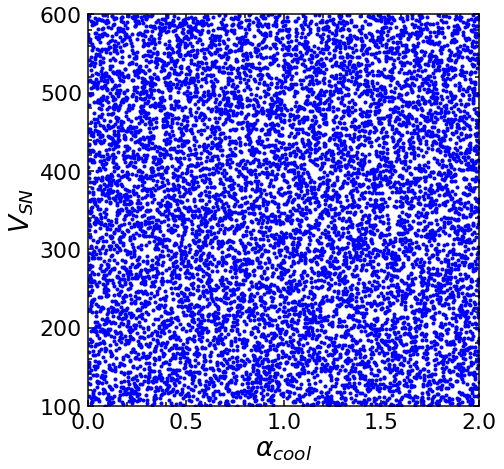

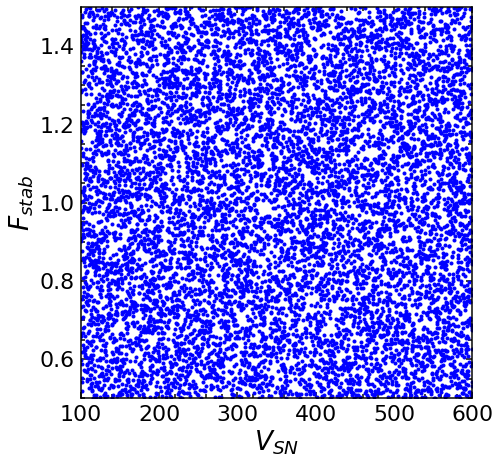

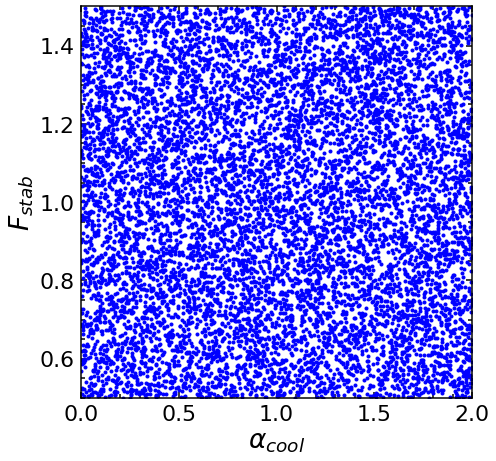

(3, 10000)


In [7]:
def plot_LH(ind,i1,i2,xlab,ylab,xlim,ylim):
    # plot the LH points
    fig = plt.figure(ind,figsize=(9.8,9.8))
    ax = plt.subplot(111)
    ax.plot(lhd[:.i1],lhd[:,i2],'.b')
    ax.set_xlabel(xlab)
    ax.set_ylabel(ylab)
    ax.set_xlim(xlim[0],xlim[1])
    ax.set_ylim(ylim[0],ylim[1])
    ax.set_box_aspect(1)
    plt.show()
    return 0

for i in range(nparam):
    for j in range(nparam):
        plot_LH(i+j,i,j,)
        
plt.close('all')

# Generating the predictions for the 10000 points
x_post = [lhd[:,0],lhd[:,1],lhd[:,2],lhd[:,3],lhd[:,4],lhd[:,5],lhd[:,6],lhd[:,7],lhd[:,8],lhd[:,9]]
print(np.shape(x_post))
x_post = np.transpose(x_post)
z = x_post.astype("float32")

# 9 models and a straight average
pre1 = model1.predict(z)
pre2 = model2.predict(z)
pre3 = model3.predict(z)
pre4 = model4.predict(z)
pre5 = model5.predict(z)
pre6 = model6.predict(z)
pre7 = model7.predict(z)
pre8 = model8.predict(z)
pre9 = model9.predict(z)
pre = (pre1+pre2+pre3+pre4+pre5+pre6+pre7+pre8+pre9)/9

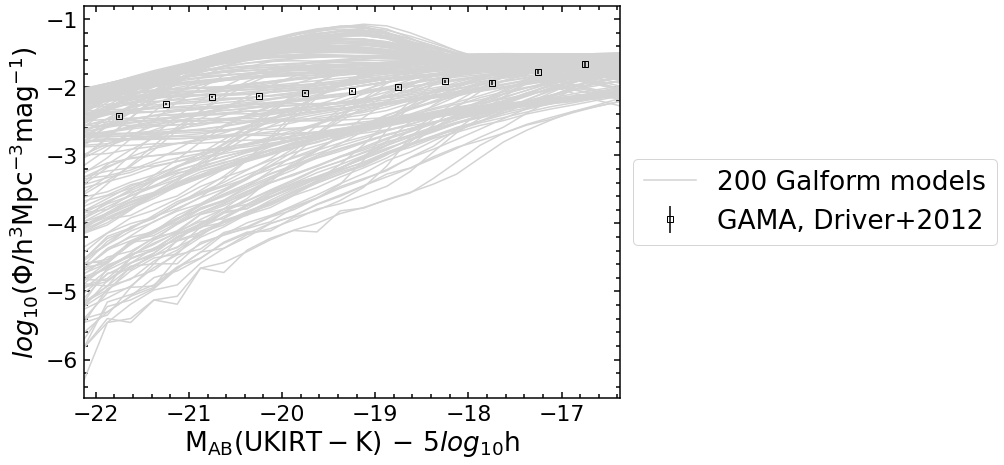

[ 1  3  5  7  9 11 13 15 17 19 21]
[ 2  4  6  8 10 12 14 16 18 20 22]


In [8]:
def chi_square(x_obs,y_obs,eh_obs,el_obs,bins,pred,npred,xlab,ylab):
    
    # consider only observational data in the range we have predicted
    ind = np.where((x_obs>=np.min(bins))&(x_obs<=np.max(bins)))
    x_obs_f = x_obs[ind]
    y_obs_f = y_obs[ind]
    eh_obs_f = eh_obs[ind]
    el_obs_f = el_obs[ind]
    emid_f = (eh_obs_f + el_obs_f)/2

    # find the indexes of the observational data considered (lower and upper to interpolate)
    ind_obs_inf = []
    ind_obs_sup = []
    for i in range(len(x_obs_f)):
        x_obs_g = x_obs_f[i]-bins
        ind_g = np.where(x_obs_g>=0)
        a = np.min(x_obs_g[ind_g])
        ind_obs_inf.append(np.where(x_obs_g == a)[0][0])
        x_obs_g = bins-x_obs_f[i]
        ind_g = np.where(x_obs_g>=0)
        a = np.min(x_obs_g[ind_g])
        ind_obs_sup.append(np.where(x_obs_g == a)[0][0])
    ind_obs_inf = np.array(ind_obs_inf)
    print(ind_obs_inf)
    ind_obs_sup = np.array(ind_obs_sup)
    print(ind_obs_sup)
    
    # arrays to store the interpolated predictions and the chi square values
    pre_f_array = np.zeros(np.shape(npred,len(ind_obs_sup))
    chi = np.zeros(np.shape(npred))
    #mae_obs = np.zeros(np.shape(npred))
                           
    fig = plt.figure(10,figsize=(9.6,7.2))
    for i in range(npred):
    
        # predictions at the exact observational points (interpolating)
        m = (pre[i,ind_obs_sup]-pre[i,ind_obs_inf])/(bins[ind_obs_sup]-bins[ind_obs_inf])
        n = pre[i,ind_obs_inf]-m*bins[ind_obs_inf]
        pre_f = m*x_obs_f + n
        # save these interpolations
        pre_f_array[i,:] = pre_f
        # save the chi square
        chi[i] = np.sum((10**y_obs_f-10**pre_f)**2/(error_obs_f**2))/len(pre_f)
        # mae_obs (in case we use it instead)
        #mae_obs[i] = np.sum(np.abs(pre_f-y_obs_f)/len(pre_f)))
    
    # plot the first 10 predictions randomly (interpolations and not)
        if i<10:
            plt.plot(bins, pre[i],'-')
        if i==1: # best fit of 10
            plt.plot(x_obs_f, pre_f,'kX') # interpolation
    plt.errorbar(x_obs_f, y_obs_f, yerr=[el_obs_f,eh_obs_f], ls='None', mfc='None', ecolor = 'black', mec='black',marker='s',label="GAMA, Driver+2012")
    plt.xlabel(xlab)
    plt.ylabel(ylab)
    # Put a legend to the right of the current axis
    plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    plt.show()
    
    return chi, pre_f_array, x_obs_f, y_obs_f, eh_obs_f, el_obs_f, ind_obs_sup, ind_obs_inf


# K LF z=0

obs_file_K = 'Obs_Data/lfk_z0_driver12.data'
mag, den, err, num = np.loadtxt(obs_file_K,unpack=True)
ind = np.where(den > 0.)
error_K = err[ind]
x_K = mag[ind]
y_K = np.log10(den[ind]/0.5) # Observations are per 0.5 mag
eh_K = np.log10(den[ind]+err[ind]) - np.log10(den[ind])
el_K = np.log10(den[ind]) - np.log10(den[ind]-err[ind])
ind = np.where(np.isinf(el_K) | np.isnan(el_K))
el_K[ind] = 999.
emid_K = (eh_K + el_K)/2

# YOU NEED TO UPLOAD THE DIFFERENT OBSERVATIONS
# ...
                           
acum = 0
chi = np.zeros(np.shape=(nparam))
for i in range(len(plots)):
    
    if plots[i]=='KLF_z0':
        chi[0],pre_K_array,x_K_f,y_K_f,eh_K_f,el_K_f,ind_K_sup,ind_K_inf = chi_square(x_K,y_K,eh_K,el_K,emid_K,bins[acum:acum+len_b[0]],pre[:,acum:acum+len_b[0]])
        acum += len_b[0]
    elif plots[i]=='rLF_z0':
        chi[1],pre_r_array,x_r_f,y_r_f,eh_r_f,el_r_f,ind_r_sup,ind_r_inf = chi_square(x_r,y_r,eh_r,el_r,emid_r,bins[acum:acum+len_b[1]],pre[:,acum:acum+len_b[1]])
        acum += len_b[1]
    elif plots[i]=='early-t_z0':
        chi[2],pre_et_array,x_et_f,y_et_f,eh_et_f,el_et_f,ind_et_sup,ind_et_inf = chi_square(x_et,y_et,eh_et,el_et,emid_et,bins[acum:acum+len_b[2]],pre[:,acum:acum+len_b[2]])
        acum += len_b[2]
    elif plots[i]=='late-t_z0':
        chi[3],pre_lt_array,x_lt_f,y_lt_f,eh_lt_f,el_lt_f,ind_lt_sup,ind_lt_inf = chi_square(x_lt,y_lt,eh_lt,el_lt,emid_lt,bins[acum:acum+len_b[3]],pre[:,acum:acum+len_b[3]])
        acum += len_b[3]
    elif plots[i]=='HIMF_z0':
        chi[4],pre_HI_array,x_HI_f,y_HI_f,eh_HI_f,el_HI_f,ind_HI_sup,ind_HI_inf = chi_square(x_HI,y_HI,eh_HI,el_HI,emid_HI,bins[acum:acum+len_b[4]],pre[:,acum:acum+len_b[4]])
        acum += len_b[4]
    elif plots[i]=='early-f_z0':
        chi[5],pre_ef_array,x_ef_f,y_ef_f,eh_ef_f,el_ef_f,ind_ef_sup,ind_ef_inf = chi_square(x_ef,y_ef,eh_ef,el_ef,emid_ef,bins[acum:acum+len_b[5]],pre[:,acum:acum+len_b[5]])
        acum += len_b[5]
    elif plots[i]=='TF_z0':
        chi[6],pre_TF_array,x_TF_f,y_TF_f,eh_TF_f,el_TF_f,ind_TF_sup,ind_TF_inf = chi_square(x_TF,y_TF,eh_TF,el_TF,emid_TF,bins[acum:acum+len_b[6]],pre[:,acum:acum+len_b[6]])
        acum += len_b[6]
    elif plots[i]=='bulge-BH_z0':
        chi[7],pre_BH_array,x_BH_f,y_BH_f,eh_BH_f,el_BH_f,ind_BH_sup,ind_BH_inf = chi_square(x_BH,y_BH,eh_BH,el_BH,emid_BH,bins[acum:acum+len_b[7]],pre[:,acum:acum+len_b[7]])
        acum += len_b[7]
    elif plots[i]=='Zstars_z0':
        chi[8],pre_z_array,x_z_f,y_z_f,eh_z_f,el_z_f,ind_z_sup,ind_z_inf = chi_square(x_z,y_z,eh_z,el_z,emid_z,bins[acum:acum+len_b[8]],pre[:,acum:acum+len_b[8]])
        acum += len_b[8]
    elif plots[i]=='KLF_z1.1':
        chi[9],pre_K_z1_array,x_K_z1_f,y_K_z1_f,eh_K_z1_f,el_K_z1_f,ind_K_z1_sup,ind_K_z1_inf = chi_square(x_K_z1,y_K_z1,eh_K_z1,el_K_z1,emid_K_z1,bins[acum:acum+len_b[9]],pre[:,acum:acum+len_b[9]])
        acum += len_b[9]
    elif plots[i]=='mgasf_z0':
        chi[10],pre_g_array,x_g_f,y_g_f,eh_g_f,el_g_f,ind_g_sup,ind_g_inf = chi_square(x_g,y_g,eh_g,el_g,emid_g,bins[acum:acum+len_b[10]],pre[:,acum:acum+len_b[10]])
        acum += len_b[10]

plt.close('all')

43.804017125343485
18.848016950023375
6.575581717652934e-08
0.27022769208084
36.39513601989329


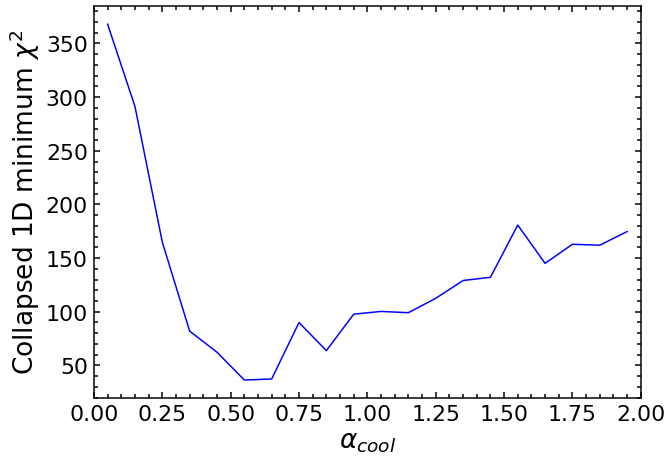

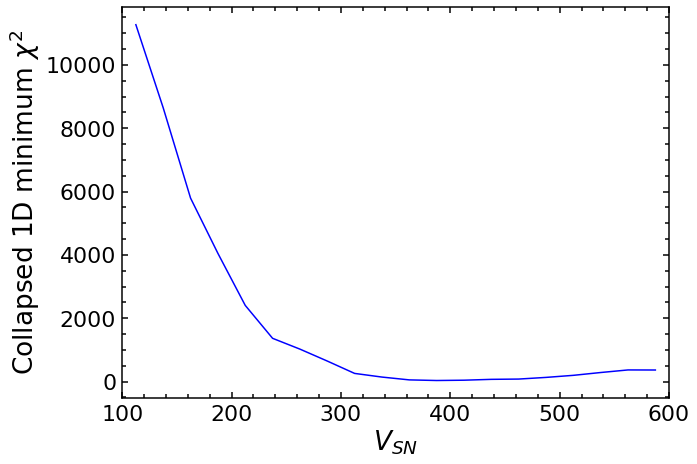

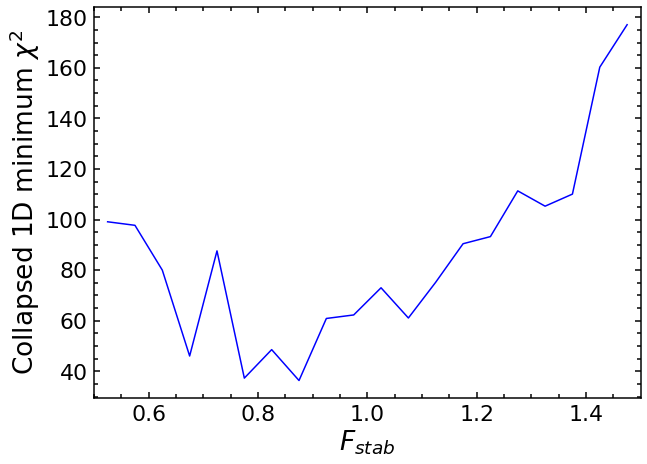

(array([3799]),)
(10000, 3)
[[0.55569524]]
[[385.69296]]
[[0.8836033]]
(10000,)
(10000,)
(10000,)
(10000,)
-2.4207643270492554


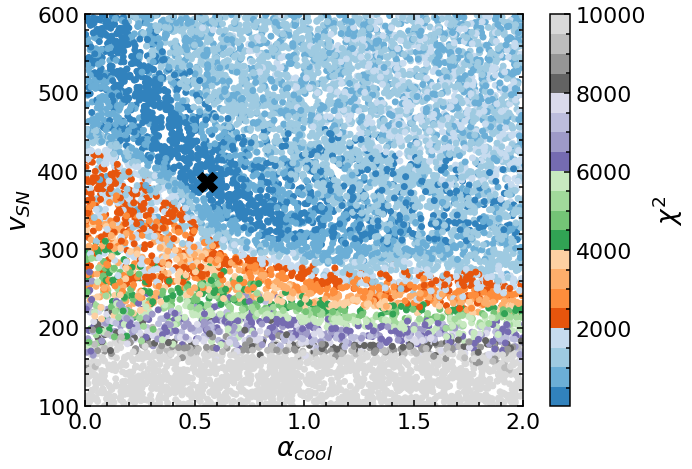

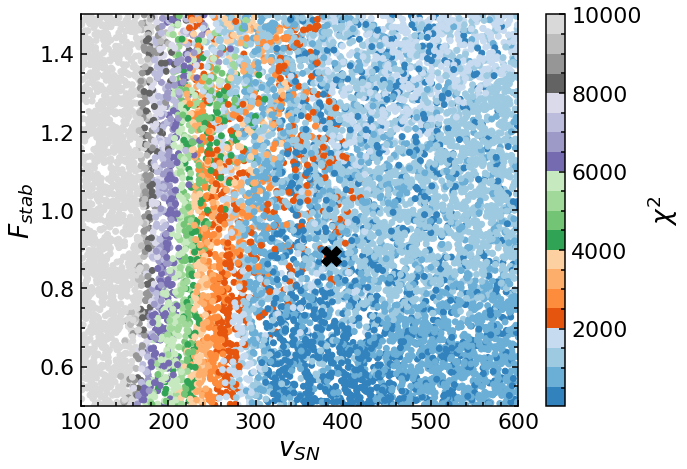

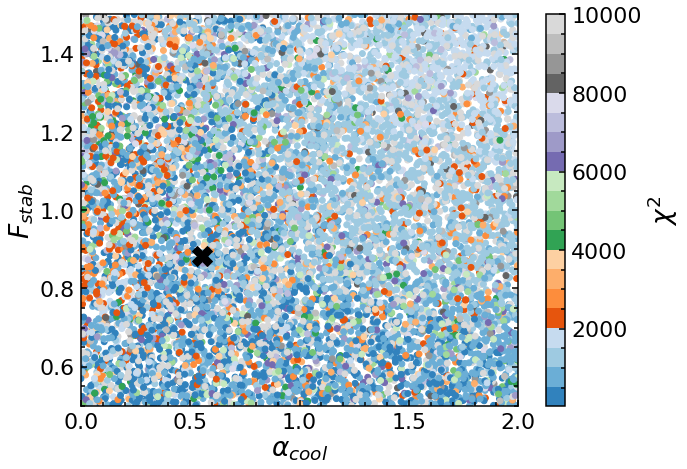

In [16]:
import matplotlib.gridspec as gridspec

# compute the total normalized chi square taking into account the weights
chi_total = sum(chi*weight)/sum(weight)
# find the index of the best fit
i_best = np.where(chi == np.min(chi))

def collapsed_hist(min_v,max_v,int_v,lhd,chi_total,i,xlabel,ylabel,xmin,xmax):
    # compute 1D probability distributions
    # chi square vs parameter value
    n = int((max_v-min_v)/int_v)
    edges = np.linspace(min_v,max_v,n+1)
    centers = (edges[0:-1]+edges[1:])/2
    ind = np.digitize(lhd,edges)
    avg = []
    for i in range(1,np.amax(ind)+1):
        pos = np.where(np.array(ind)==i)
        avg.append(np.min(chi_total[pos]))
    avg = np.array(avg)
    plt.rcParams.update({'font.size': 22})
    fig = plt.figure(i,figsize=(9.8,7.2))
    plt.plot(centers,avg,'-b',markersize=20)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.xlim(xmin,xmax)
    plt.show()
    return 0

acum = 0
# best fit of the different parameters
params_bestfit = np.zeros(np.shape=(nparam))
params_bestfit[:] = np.nan

for i in range(len(plots)):
    
    if plots[i]=='KLF_z0':
        collapsed_hist(,,,lhd[:,i],chi_total,i,,,,)
        params_bestfit[i] = lhd[i_best,i]
        pre_K_bestfit = pre_K_array[i_best,:]
    elif plots[i]=='rLF_z0':
        collapsed_hist(,,,lhd[:,i],chi_total,i,,,,)
        params_bestfit[i] = lhd[i_best,i]
        pre_r_bestfit = pre_r_array[i_best,:]
    elif plots[i]=='early-t_z0':
        collapsed_hist(,,,lhd[:,i],chi_total,i,,,,)
        params_bestfit[i] = lhd[i_best,i]
        pre_et_bestfit = pre_et_array[i_best,:]
    elif plots[i]=='late-t_z0':
        collapsed_hist(,,,lhd[:,i],chi_total,i,,,,)
        params_bestfit[i] = lhd[i_best,i]
        pre_lt_bestfit = pre_lt_array[i_best,:]
    elif plots[i]=='HIMF_z0':
        collapsed_hist(,,,lhd[:,i],chi_total,i,,,,)
        params_bestfit[i] = lhd[i_best,i]
        pre_HI_bestfit = pre_HI_array[i_best,:]
    elif plots[i]=='early-f_z0':
        collapsed_hist(,,,lhd[:,i],chi_total,i,,,,)
        params_bestfit[i] = lhd[i_best,i]
        pre_ef_bestfit = pre_ef_array[i_best,:]
    elif plots[i]=='TF_z0':
        collapsed_hist(,,,lhd[:,i],chi_total,i,,,,)
        params_bestfit[i] = lhd[i_best,i]
        pre_TF_bestfit = pre_TF_array[i_best,:]
    elif plots[i]=='bulge-BH_z0':
        collapsed_hist(,,,lhd[:,i],chi_total,i,,,,)
        params_bestfit[i] = lhd[i_best,i]
        pre_BH_bestfit = pre_BH_array[i_best,:]
    elif plots[i]=='Zstars_z0':
        collapsed_hist(,,,lhd[:,i],chi_total,i,,,,)
        params_bestfit[i] = lhd[i_best,i]
        pre_z_bestfit = pre_z_array[i_best,:]
    elif plots[i]=='KLF_z1.1':
        collapsed_hist(,,,lhd[:,i],chi_total,i,,,,)
        params_bestfit[i] = lhd[i_best,i]
        pre_K_z1_bestfit = pre_K_z1_array[i_best,:]
    elif plots[i]=='mgasf_z0':
        collapsed_hist(,,,lhd[:,i],chi_total,i,,,,)
        params_bestfit[i] = lhd[i_best,i]
        pre_g_bestfit = pre_g_array[i_best,:]

plt.close('all')

def plot_prob(lhd1,lhd2,chi_total,best1,best2,xlabel,ylabel,xmin,xmax,ymin,ymax,ind):
    # compute 2D probability distributions
    # chi square vs 2 parameter values
    plt.rcParams.update({'font.size': 22})
    fig = plt.figure(ind,figsize=(9.8,7.2))
    cm = plt.cm.get_cmap('tab20c')
    #sc = plt.scatter(z[:,0], z[:,1], c=chi, vmin=np.min(chi), vmax=np.max(chi), s=35, cmap=cm)
    sc = plt.scatter(lhd1, lhd2, c=chi_total, vmin=np.min(chi_total), vmax=np.max(chi_total), s=35, cmap=cm)
    plt.plot(best1,best2,'kX',markersize=20)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.xlim(xmin,xmax)
    plt.ylim(ymin,ymax)
    cbar = plt.colorbar(sc)
    cbar.set_label(r'$\chi^{2}$')
    plt.show()
    return 0
        
for i in range(nparam):
    for j in range(nparam):
        plot_prob(lhd[i],lhd[j],chi_total,params_bestfit[i],params_bestfit[j],,,,i+j)

plt.close('all')

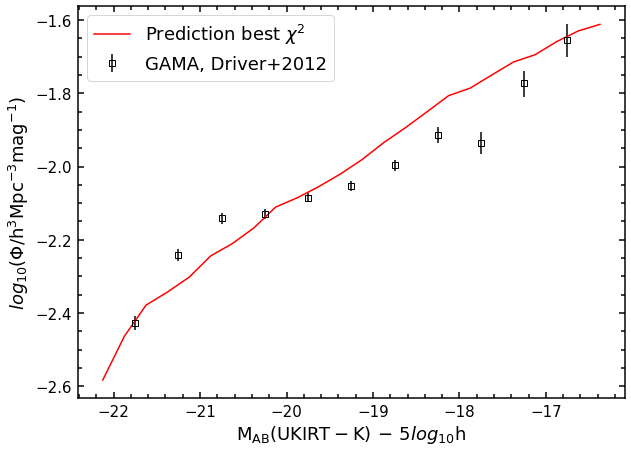

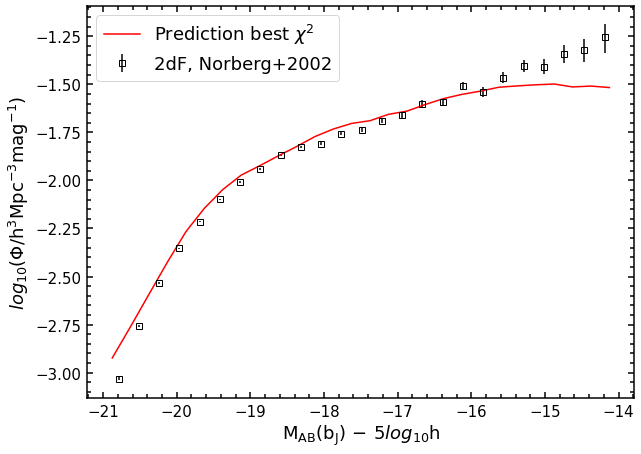

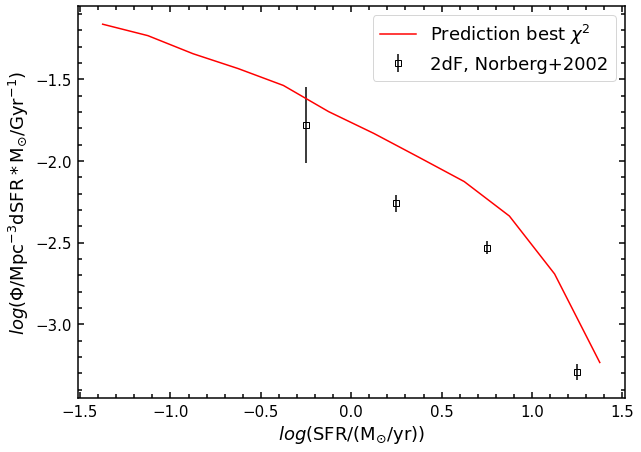

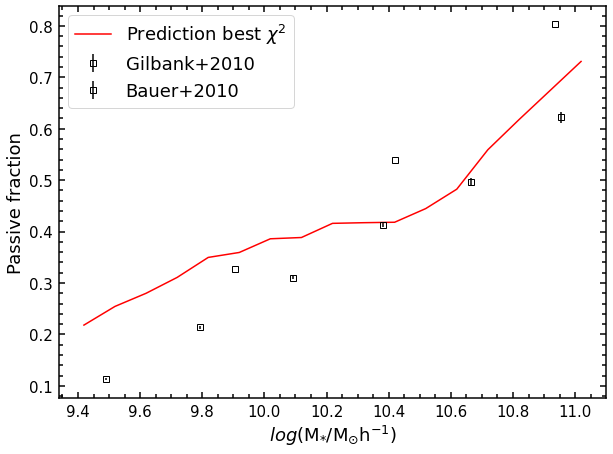

In [43]:
def plot_bestpred(x_obs_f,y_obs_f,el_obs_f,eh_obs_f,bins,pred,xlabel,ylabel,i):
    # compare the best fit prediction (not interpolated) to the observational datap
    fig = plt.figure(i,figsize=(9.8,7.2))
    plt.errorbar(x_obs_f, y_obs_f, yerr=[el_obs_f,eh_obs_f], ls='None', mfc='None', ecolor = 'black', mec='black',marker='s',label="GAMA, Driver+2012")
    plt.plot(bins, pre,'-r',label=r'Prediction best $\chi^{2}$')
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.legend()
    plt.show()
    return 0

acum = 0
for i in range(len(plots)):
    
    if plots[i]=='KLF_z0':
        plot_bestpred(x_K_f,y_K_f,el_K_f,eh_K_f,bins[acum:acum+len_b[0]],pre[i_best,acum:acum+len_b[0]])
        acum += len_b[0]
    elif plots[i]=='rLF_z0':
        plot_bestpred(x_r_f,y_r_f,el_r_f,eh_r_f,bins[acum:acum+len_b[1]],pre[i_best,acum:acum+len_b[1]])
        acum += len_b[1]
    elif plots[i]=='early-t_z0':
        plot_bestpred(x_et_f,y_et_f,el_et_f,eh_et_f,bins[acum:acum+len_b[2]],pre[i_best,acum:acum+len_b[2]])
        acum += len_b[2]
    elif plots[i]=='late-t_z0':
        plot_bestpred(x_lt_f,y_lt_f,el_lt_f,eh_lt_f,bins[acum:acum+len_b[3]],pre[i_best,acum:acum+len_b[3]])
        acum += len_b[3]
    elif plots[i]=='HIMF_z0':
        plot_bestpred(x_HI_f,y_HI_f,el_HI_f,eh_HI_f,bins[acum:acum+len_b[4]],pre[i_best,acum:acum+len_b[4]])
        acum += len_b[4]
    elif plots[i]=='early-f_z0':
        plot_bestpred(x_ef_f,y_ef_f,el_ef_f,eh_ef_f,bins[acum:acum+len_b[5]],pre[i_best,acum:acum+len_b[5]])
        acum += len_b[5]
    elif plots[i]=='TF_z0':
        plot_bestpred(x_TF_f,y_TF_f,el_TF_f,eh_TF_f,bins[acum:acum+len_b[6]],pre[i_best,acum:acum+len_b[6]])
        acum += len_b[6]
    elif plots[i]=='bulge-BH_z0':
        plot_bestpred(x_BH_f,y_BH_f,el_BH_f,eh_BH_f,bins[acum:acum+len_b[7]],pre[i_best,acum:acum+len_b[7]])
        acum += len_b[7]
    elif plots[i]=='Zstars_z0':
        plot_bestpred(x_z_f,y_z_f,el_z_f,eh_z_f,bins[acum:acum+len_b[8]],pre[i_best,acum:acum+len_b[8]])
        acum += len_b[8]
    elif plots[i]=='KLF_z1.1':
        plot_bestpred(x_K_z1_f,y_K_z1_f,el_K_z1_f,eh_K_z1_f,bins[acum:acum+len_b[9]],pre[i_best,acum:acum+len_b[9]])
        acum += len_b[9]
    elif plots[i]=='mgasf_z0':
        plot_bestpred(x_K_g_f,y_K_g_f,el_K_g_f,eh_K_g_f,bins[acum:acum+len_b[10]],pre[i_best,acum:acum+len_b[10]])
        acum += len_b[10]

plt.close('all')

In [44]:
# best fit params with more decimal figures
for i in range(nparams):  
    print('{0:.16f}'.format(params_bestfit[i]))

0.5556952357292175
385.6929626464843750
0.8836032748222351


In [45]:
def final_bestfit(file,bins,lbins,ubins,ind_obs_sup,ind_obs_inf,x_obs_f,y_obs_f,el_obs_f,eh_obs_f,&
                   pre_best,pre_f_array,i,ymin,ymax,xtit,ytit,ybtit,obslab,lab0,lab1,comm):
    # upload best fit results (once run GALFORM using the best fit parameters)
    A = np.loadtxt(file)
    bestfit = A[1,lbins:-ubins]
    # interpolate the Galform best fit at the observational datapoints
    m_bestfit = (bestfit[ind_obs_sup]-bestfit[ind_obs_inf])/(bins[ind_obs_sup]-bins[ind_obs_inf])
    n_bestfit = bestfit[ind_obs_inf]-m_bestfit*bins[ind_obs_inf]
    bestfit_f = m_bestfit*x_obs_f + n_bestfit
    
    # plot the observations, best fit predictions and Galform best fit
    # and also the ratio between prediction (interpolating) and obs.
    # as well as the ratio between Galform (interpolating) and obs.
    fig = plt.figure(i,figsize=(9.8,12.8))
    gs = gridspec.GridSpec(5,1)
    gs.update(wspace=0., hspace=0.)
    xmin = np.min(bins) #np.min(bins_K[:,0])
    n = int(np.max(bins)-np.min(bins))/0.5
    xmax = np.min(bins) + n*0.5 +0.5 #np.max(bins_K[:,0])
    ymin = ymin ; ymax = ymax
    yminb = 0.8 ; ymaxb = 1.2
    xtit = xtit
    ytit = ytit
    ytitb = ybtit
    axb = plt.subplot(gs[-2:,:])
    axb.set_autoscale_on(False) ; axb.minorticks_on()
    axb.set_xlim(xmin,xmax) ; axb.set_ylim(yminb,ymaxb)
    axb.set_xlabel(xtit) ; axb.set_ylabel(ytitb)
    ax = plt.subplot(gs[:-2,:],sharex=axb)
    ax.set_ylabel(ytit)
    ax.set_autoscale_on(False) ; ax.minorticks_on()
    ax.set_ylim(ymin,ymax) ; start, end = ax.get_xlim()
    #ax.xaxis.set_ticks(np.arange(np.min(bins_K[:,0]), np.max(bins_K[:,0]), 1))
    ax.plot([],[],' ')
    plt.setp(ax.get_xticklabels(), visible=False)
    ax.errorbar(x_obs_f, y_obs_f, yerr=[el_obs_f,eh_obs_f], ls='None', mfc='None', ecolor = 'black', mec='black',marker='s',label=obslab)
    ax.plot(bins, pre_best,'-r')
    ax.plot(bins, bestfit,'-b')
    #axb.errorbar(m_center_f,pre_f_array/smf_f,xerr=[m_center_f-m_low_f,m_upp_f-m_center_f], yerr=[pre_f_array/smf_f-pre_f_array/(smf_f-(np.log10(p3[ind])-np.log10(p3[ind]-dp3[ind]))), pre_f_array/(smf_f+np.log10(p3[ind]+dp3[ind])-np.log10(p3[ind]))-pre_f_array/smf_f],ls='None',c='b',markersize=8)
    axb.errorbar(x_obs_f,pre_f_array/y_obs_f, yerr=[pre_f_array/y_obs_f-pre_f_array/(y_obs_f-el_obs_f),&
                                                    pre_f_array/(y_obs_f+eh_obs_f)-pre_f_array/y_obs_f],ls='None',mfc='None', ecolor = 'r', mec='r',marker='s',c='r',markersize=8)
    axb.errorbar(x_obs_f,bestfit_f/y_obs_f, yerr=[bestfit_f/y_obs_f-bestfit_f/(y_obs_f-el_obs_f), &
                                              bestfit_f/(y_obs_f+eh_obs_f)-bestfit_f/y_obs_f],ls='None',mfc='None', ecolor = 'b', mec='b',marker='s',c='b',markersize=8)
    axb.axhline(y=1,ls='-',c='grey')
    label0 = lab0
    label = r'Emulator best $\chi^{2}$'
    label1p=r'Galform best $\chi^{2}$'
    label1 = lab1 
    leg = ax.legend([label0,label,label1p,label1], loc=4,fontsize=20)
    leg.draw_frame(False) 
    plt.show()
    #plt.savefig('best_fit.png',facecolor='white', transparent=False)

    # save the prediction best fit (not interpolated)
    outfil = 'bestfit'+plots[i]+'_em.dat'
    tofile = zip(bins,pre_best)
    with open(outfil, 'w') as outf: # written mode (not appended)
        outf.write(comm)
        np.savetxt(outf,list(tofile))#,fmt=('%.5f'))
        outf.closed 

acum = 0
for i in range(len(plots)):
    
    if plots[i]=='KLF_z0':
        bestfit_K = final_bestfit('bestfit'+plots[i]+'.dat',pre_f_array[i_best,:],bins[acum:acum+len_b[0]],lbins,ubins,ind_K_sup,ind_K_inf,x_K_f)
        acum += len_b[0]
    elif plots[i]=='rLF_z0':
        plot_bestpred(x_r_f,y_r_f,el_r_f,eh_r_f,bins[acum:acum+len_b[1]],pre[i_best,acum:acum+len_b[1]])
        acum += len_b[1]
    elif plots[i]=='early-t_z0':
        plot_bestpred(x_et_f,y_et_f,el_et_f,eh_et_f,bins[acum:acum+len_b[2]],pre[i_best,acum:acum+len_b[2]])
        acum += len_b[2]
    elif plots[i]=='late-t_z0':
        plot_bestpred(x_lt_f,y_lt_f,el_lt_f,eh_lt_f,bins[acum:acum+len_b[3]],pre[i_best,acum:acum+len_b[3]])
        acum += len_b[3]
    elif plots[i]=='HIMF_z0':
        plot_bestpred(x_HI_f,y_HI_f,el_HI_f,eh_HI_f,bins[acum:acum+len_b[4]],pre[i_best,acum:acum+len_b[4]])
        acum += len_b[4]
    elif plots[i]=='early-f_z0':
        plot_bestpred(x_ef_f,y_ef_f,el_ef_f,eh_ef_f,bins[acum:acum+len_b[5]],pre[i_best,acum:acum+len_b[5]])
        acum += len_b[5]
    elif plots[i]=='TF_z0':
        plot_bestpred(x_TF_f,y_TF_f,el_TF_f,eh_TF_f,bins[acum:acum+len_b[6]],pre[i_best,acum:acum+len_b[6]])
        acum += len_b[6]
    elif plots[i]=='bulge-BH_z0':
        plot_bestpred(x_BH_f,y_BH_f,el_BH_f,eh_BH_f,bins[acum:acum+len_b[7]],pre[i_best,acum:acum+len_b[7]])
        acum += len_b[7]
    elif plots[i]=='Zstars_z0':
        plot_bestpred(x_z_f,y_z_f,el_z_f,eh_z_f,bins[acum:acum+len_b[8]],pre[i_best,acum:acum+len_b[8]])
        acum += len_b[8]
    elif plots[i]=='KLF_z1.1':
        plot_bestpred(x_K_z1_f,y_K_z1_f,el_K_z1_f,eh_K_z1_f,bins[acum:acum+len_b[9]],pre[i_best,acum:acum+len_b[9]])
        acum += len_b[9]
    elif plots[i]=='mgasf_z0':
        plot_bestpred(x_K_g_f,y_K_g_f,el_K_g_f,eh_K_g_f,bins[acum:acum+len_b[10]],pre[i_best,acum:acum+len_b[10]])
        acum += len_b[10]

plt.close('all')

(24,)
(28,)
(12,)
(17,)
